YouTube Virality Analysis & Forecasting
=======================================

Project Steps:
1. Load and preprocess YouTube dataset  
2. Explore data using summary statistics and visualizations  
3. Identify trends over time (line plots)  
4. Analyze feature relationships (correlation heatmap)  
5. Rank top-performing videos by engagement metrics  
6. Build supervised learning model (Random Forest Classifier) to classify viral videos  
7. Perform unsupervised clustering (K-Means) to group similar videos  
8. Apply statistical modeling (OLS Regression) for feature impact analysis  
9. Perform time series forecasting (ARIMA) for future trend prediction  
10. Summarize findings and evaluate model performance  


In [2]:
# YouTube Virality Analysis & Forecasting - Clean Version
# ============================================================

# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# --- 2. Load Dataset ---
df = pd.read_csv(r"C:\Users\shres\Downloads\CAP735\youtube_virality.csv")
print(f"Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# --- 3. Data Preprocessing ---
df = df.dropna()  # Remove missing values
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])  # Encode categorical columns

Data Loaded: 1000 rows, 18 columns


In [4]:
df.head(20)

,video_id,title,channel_name,publish_date,duration_seconds,category,tags,country,days_since_publish,views,likes,dislikes,comments,subscribers,avg_daily_views,growth_30d,is_trending,virality_label
0,770,15,816,489,464,1,691,2,684,31169,2978,74,283,100,45.57,0.0915,0,0
1,924,274,380,655,2384,2,817,9,302,4133,311,11,46,100,13.69,0.1501,0,0
2,559,450,711,569,2379,9,373,2,502,29058,1872,61,436,5916,57.88,0.0305,0,0
3,397,333,254,135,3225,9,768,7,1520,81345,3650,118,1137,100,53.52,0.0382,0,0
4,639,59,806,732,3258,6,893,5,117,25088,1407,30,439,100,214.43,0.5430,0,0
5,439,244,45,205,1615,7,813,9,1366,83795,5760,118,642,100,61.34,0.3928,0,0
6,546,61,589,328,1225,3,115,0,1099,62257,2421,207,985,6498,56.65,0.3214,0,0
7,95,245,120,736,2689,7,791,0,105,13453,920,9,83,1412,128.12,-0.1002,0,0
8,143,385,990,522,1961,8,152,2,612,12601,640,26,88,4723,20.59,-0.2307,0,0
9,433,223,506,505,3286,6,396,6,645,23407,1110,35,288,4719,36.29,-0.4797,0,0


In [54]:
df.tail()

,video_id,title,channel_name,publish_date,duration_seconds,category,tags,country,days_since_publish,views,likes,dislikes,comments,subscribers,avg_daily_views,growth_30d,is_trending,virality_label
995,662,109,947,630,2570,3,221,2,351,33111,753,2,237,10786,94.33,0.9226,0,0
996,860,126,864,198,315,1,439,4,1376,52275,3151,113,614,10341,37.99,0.2739,0,0
997,942,0,137,122,1868,0,722,4,1544,27367,1581,77,285,100,17.72,-0.1929,0,0
998,612,434,370,296,1969,8,841,8,1158,58531,2052,111,212,4546,50.54,-0.2884,0,0
999,865,252,337,225,3135,7,215,9,1328,18615,1160,25,100,2777,14.02,0.4407,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            1000 non-null   int64  
 1   title               1000 non-null   int64  
 2   channel_name        1000 non-null   int64  
 3   publish_date        1000 non-null   int64  
 4   duration_seconds    1000 non-null   int64  
 5   category            1000 non-null   int64  
 6   tags                1000 non-null   int64  
 7   country             1000 non-null   int64  
 8   days_since_publish  1000 non-null   int64  
 9   views               1000 non-null   int64  
 10  likes               1000 non-null   int64  
 11  dislikes            1000 non-null   int64  
 12  comments            1000 non-null   int64  
 13  subscribers         1000 non-null   int64  
 14  avg_daily_views     1000 non-null   float64
 15  growth_30d          1000 non-null   float64
 16  is_tren

In [57]:
df.describe()

,video_id,title,channel_name,publish_date,duration_seconds,category,tags,country,days_since_publish,views,likes,dislikes,comments,subscribers,avg_daily_views,growth_30d,is_trending,virality_label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,499.500000,261.989000,498.365000,393.086000,1809.66300,4.538000,498.322000,4.596000,916.308000,8.322187e+04,4011.17700,161.480000,859.400000,10735.59600,222.221040,0.034572,0.01200,0.140000
std,288.819436,152.039583,287.974504,225.087683,1038.70538,2.840885,288.072661,2.976515,531.198604,2.621665e+05,12586.13478,504.655886,3293.197682,43192.79074,1463.886523,0.366227,0.10894,0.377548
min,0.000000,0.000000,0.000000,0.000000,32.00000,0.000000,0.000000,0.000000,1.000000,9.510000e+02,0.00000,0.000000,0.000000,100.00000,5.300000,-0.500000,0.00000,0.000000
25%,249.750000,128.750000,249.750000,198.000000,887.75000,2.000000,248.750000,2.000000,457.750000,2.863500e+04,1224.00000,41.000000,192.750000,100.00000,39.285000,-0.253725,0.00000,0.000000
50%,499.500000,257.500000,497.500000,396.500000,1829.00000,5.000000,498.500000,5.000000,906.500000,4.995300e+04,2321.50000,89.000000,433.000000,3539.00000,57.145000,0.020400,0.00000,0.000000
75%,749.250000,390.000000,747.250000,589.250000,2732.75000,7.000000,747.250000,7.000000,1376.000000,7.777950e+04,3888.50000,155.250000,786.500000,11736.75000,103.422500,0.286100,0.00000,0.000000
max,999.000000,528.000000,997.000000,780.000000,3600.00000,9.000000,997.000000,9.000000,1824.000000,3.618930e+06,227756.00000,8283.000000,61047.000000,739645.00000,34886.000000,1.641000,1.00000,2.000000


In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\shres\Downloads\CAP735\youtube_virality.csv")

# Identify date column and main metric
date_col = [c for c in df.columns if "date" in c.lower()][0]
metric_col = [c for c in df.select_dtypes(include=['int64','float64']).columns 
              if c.lower() in ['views','likes','comments']][0]

# Drop rows missing critical values
df.dropna(subset=[date_col, metric_col], inplace=True)

# Convert date to datetime format and drop invalid dates
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.dropna(subset=[date_col], inplace=True)

# Fill remaining numeric missing values with 0
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill remaining categorical missing values with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Encode categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Summary
print(f"Data after preprocessing: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head())


Data after preprocessing: 1000 rows, 18 columns
   video_id  title  channel_name publish_date  duration_seconds  category  \
0       770     15           816   2023-09-28               464         1   
1       924    274           380   2024-10-14              2384         2   
2       559    450           711   2024-03-28              2379         9   
3       397    333           254   2021-06-14              3225         9   
4       639     59           806   2025-04-17              3258         6   

   tags  country  days_since_publish  views  likes  dislikes  comments  \
0   691        2                 684  31169   2978        74       283   
1   817        9                 302   4133    311        11        46   
2   373        2                 502  29058   1872        61       436   
3   768        7                1520  81345   3650       118      1137   
4   893        5                 117  25088   1407        30       439   

   subscribers  avg_daily_views  growth_30d 

In [94]:
# --- Summary & Column Detection ---
print("\nSummary (Numeric Columns):")
print(df.describe().T)

# Detect date and metric columns
date_col = [c for c in df.columns if "date" in c.lower()][0]
metric = [c for c in df.select_dtypes(include=['int64', 'float64']).columns
          if c.lower() in ['views', 'likes', 'comments']][0]

# Clean date & sort
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.dropna(subset=[date_col, metric], inplace=True)
df.sort_values(date_col, inplace=True)

print(f"Date Column: {date_col} | Metric Column: {metric}")



Summary (Numeric Columns):
                     count                        mean                  min  \
video_id            1000.0                       499.5                  0.0   
title               1000.0                     261.989                  0.0   
channel_name        1000.0                     498.365                  0.0   
publish_date          1000  2023-02-07 16:36:28.800000  2020-08-14 00:00:00   
duration_seconds    1000.0                    1809.663                 32.0   
category            1000.0                       4.538                  0.0   
tags                1000.0                     498.322                  0.0   
country             1000.0                       4.596                  0.0   
days_since_publish  1000.0                     916.308                  1.0   
views               1000.0                   83221.868                951.0   
likes               1000.0                    4011.177                  0.0   
dislikes            1000

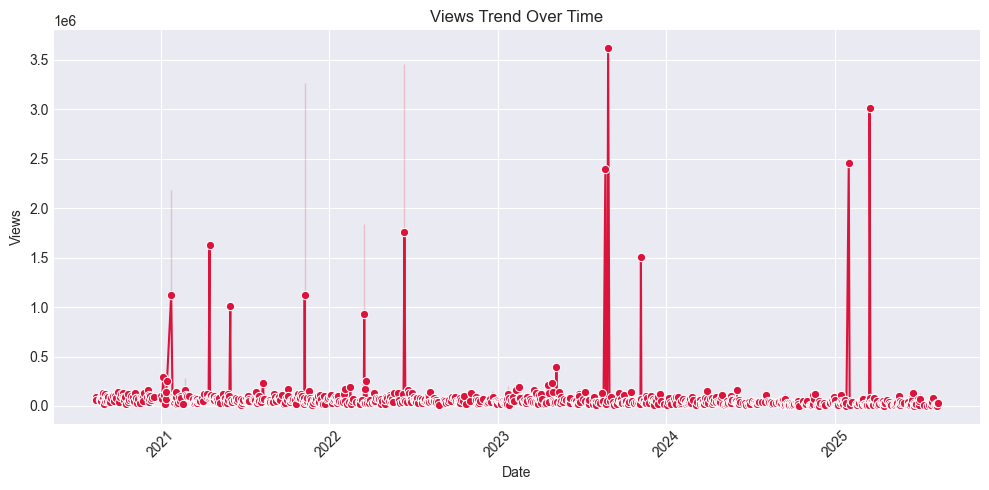

views trend over time, showing peak activity periods.


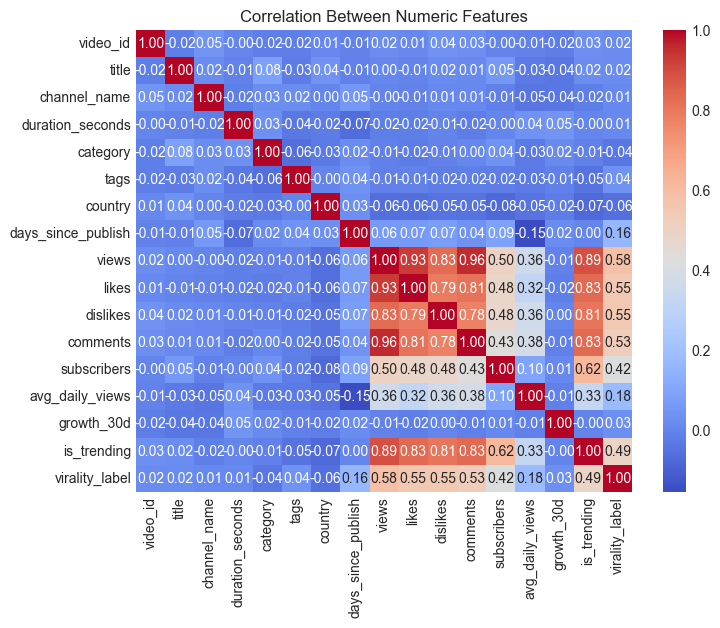

Shows relationships between numeric features.


C:\Users\shres\AppData\Local\Temp\ipykernel_17652\3097867175.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_videos_df['views'], y=top_videos_df['video_label'], palette="viridis")


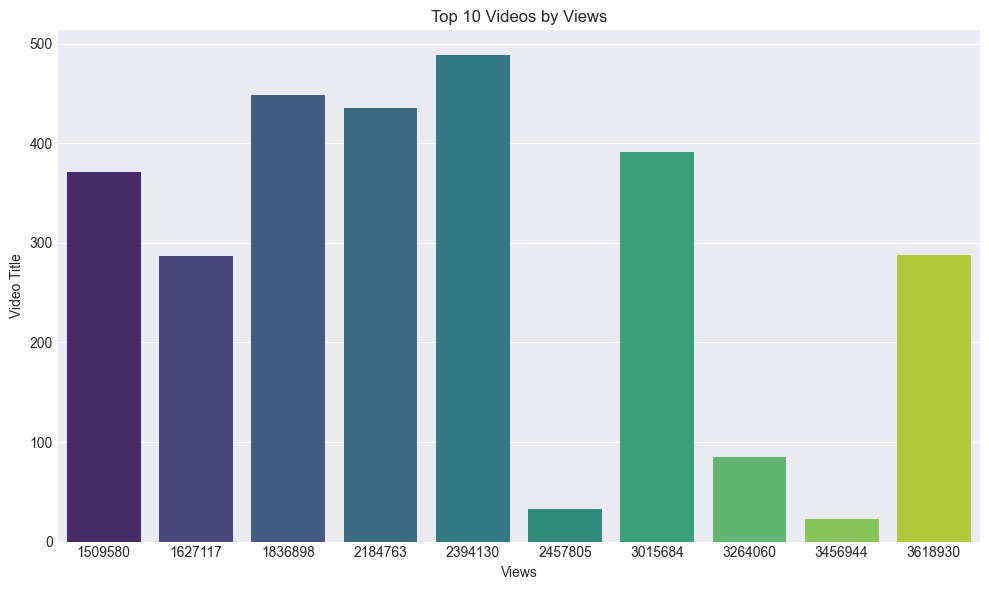

Top 10 videos by highest views:
     title    views
261    288  3618930
29      23  3456944
678     85  3264060
315    391  3015684
772     33  2457805
594    489  2394130
846    435  2184763
336    449  1836898
96     287  1627117
397    371  1509580


In [98]:
# ============================================================
# EDA & VISUALIZATIONS
# ============================================================

# 6. Trend Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=date_col, y=metric, data=df, marker="o", color="crimson")
plt.title(f"{metric.capitalize()} Trend Over Time")
plt.xlabel("Date")
plt.ylabel(metric.capitalize())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"{metric} trend over time, showing peak activity periods.")

# 7. Correlation Heatmap
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()
print("Shows relationships between numeric features.")

# 8. Top 10 Videos by Views
# Use only video title for labeling
df['video_label'] = df['title']

# Sort by views descending and pick top 10
top_videos_df = df.sort_values(by='views', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_videos_df['views'], y=top_videos_df['video_label'], palette="viridis")
plt.title("Top 10 Videos by Views")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()

print("Top 10 videos by highest views:")
print(top_videos_df[['title', 'views']])


In [106]:
# ============================================================
# SUPERVISED LEARNING: Random Forest Classifier
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create target variable 'viral' (top 25% views = 1, else 0)
df['viral'] = (df['views'] >= df['views'].quantile(0.75)).astype(int)

# Step 2: Select numeric features and the target
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['viral'])
y = df['viral']

# Step 3: Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train Random Forest Classifier on training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict viral videos on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model’s accuracy and performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[150   0]
 [  0  50]]


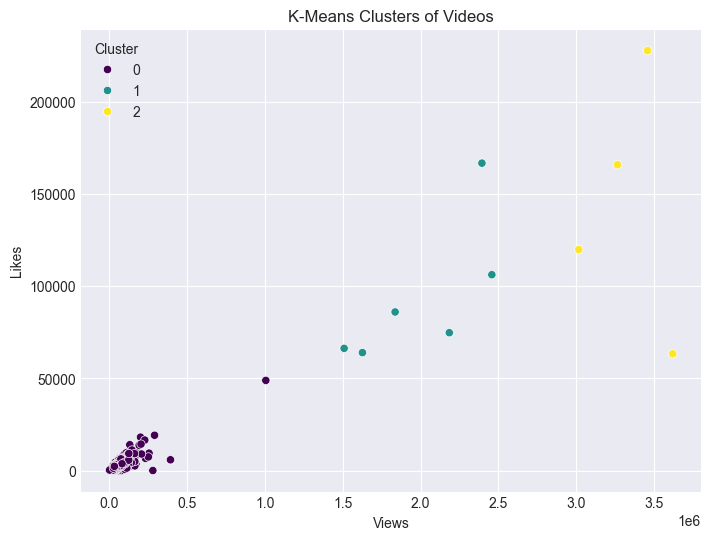

In [108]:

# ============================================================
# UNSUPERVISED LEARNING (K-Means Clustering)
# ============================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Run K-Means clustering to group videos into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)  # Assign cluster labels to the dataframe

# Plot views vs likes, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', hue='Cluster', data=df, palette='viridis')
plt.title("K-Means Clusters of Videos")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()


In [109]:
# STATISTICAL MODEL (OLS Regression)
# ============================================================

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error

# Select predictors (features) excluding the target metric
predictors = [col for col in X.columns if col != metric]

# Add a constant term to the predictors (intercept)
X_ols = sm.add_constant(df[predictors])

# Target variable
y_ols = df[metric]

# Fit Ordinary Least Squares (OLS) regression model
ols_model = sm.OLS(y_ols, X_ols).fit()

# Print summary of the regression results
print("\n📈 OLS Regression Summary:")
print(ols_model.summary())

# Predict target values using the fitted model
y_pred_ols = ols_model.predict(X_ols)

# Calculate and print R-squared and Mean Absolute Error
print(f"R² Score: {r2_score(y_ols, y_pred_ols):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_ols, y_pred_ols):.4f}")



📈 OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     4698.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:10:53   Log-Likelihood:                -11720.
No. Observations:                1000   AIC:                         2.347e+04
Df Residuals:                     983   BIC:                         2.356e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const    

C:\Users\shres\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shres\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shres\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shres\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

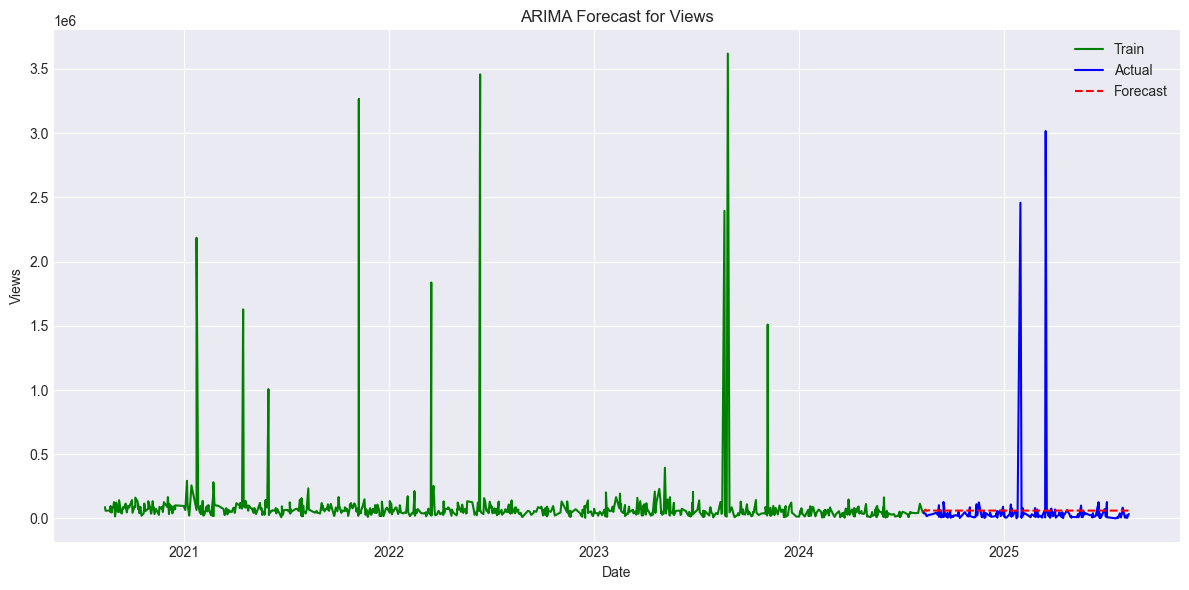


📊 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  views   No. Observations:                  800
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11137.912
Date:                Wed, 13 Aug 2025   AIC                          22287.824
Time:                        19:11:44   BIC                          22315.924
Sample:                             0   HQIC                         22298.619
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8698      0.022    -38.923      0.000      -0.914      -0.826
ar.L2         -0.7323      0.029    -25.011      0.000      -0.790      -0.675
ar.L3         -0.5718      0

In [110]:
# TIME SERIES FORECASTING (ARIMA)
# ============================================================

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the time series data: keep date and metric, remove missing values, and sort by date
ts_df = df[[date_col, metric]].dropna().sort_values(date_col)
ts_df.set_index(date_col, inplace=True)

# Split data into training (80%) and testing (20%) sets
train_size = int(len(ts_df) * 0.8)
train, test = ts_df[metric][:train_size], ts_df[metric][train_size:]

# Fit the ARIMA model (order = (p=5, d=1, q=0))
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the training data, actual test data, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Train", color="green")
plt.plot(test.index, test, label="Actual", color="blue")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="--")
plt.title(f"ARIMA Forecast for {metric.capitalize()}")
plt.xlabel("Date")
plt.ylabel(metric.capitalize())
plt.legend()
plt.tight_layout()
plt.show()

# Print model summary with key statistics
print("\n📊 ARIMA Model Summary:")
print(model_fit.summary())


In [113]:
#Summary of Findings
print("\n=== PROJECT SUMMARY ===")

# Show dataset size
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Find date and main metric columns
date_col = [col for col in df.columns if "date" in col.lower()][0]
metric = [col for col in df.select_dtypes(['int64', 'float64']).columns 
          if col.lower() in ['views', 'likes', 'comments']][0]

# Show date range and metric
print(f"Data from {df[date_col].min().date()} to {df[date_col].max().date()}.")
print(f"Main metric analyzed: {metric}")

# Show cluster info if available
if 'Cluster' in df.columns:
    counts = df['Cluster'].value_counts()
    print(f"Found {counts.size} clusters with these counts: {counts.to_dict()}")

# Show model accuracy if exists
try:
    print(f"Model accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
except:3
    pass

print("===================")



=== PROJECT SUMMARY ===
Dataset has 1000 rows and 21 columns.
Data from 2020-08-14 to 2025-08-11.
Main metric analyzed: views
Found 3 clusters with these counts: {0: 990, 1: 6, 2: 4}
Model accuracy: 100.00%
